# Simphony circuit simulator

[Simphony](https://simphonyphotonics.readthedocs.io/en/latest/) is a circuit simulator based on [scikit-rf](https://scikit-rf.readthedocs.io/en/latest/)

The main advantage of simphony over [SAX](https://flaport.github.io/sax/) is that simphony works in Windows, Linux and MacOs. While SAX only works on MacOs and Linux.

It also supports the SiEPIC PDK library natively.

## Component models

You can use component models from :

- Sparameters from Lumerical FDTD simulations thanks to the gdsfactory Lumerical plugin
- [SiPANN](https://sipann.readthedocs.io/en/latest/?badge=latest) open source package

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gdsfactory as gf

import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc

2022-11-27 23:49:08.269 | INFO     | gdsfactory.config:<module>:46 - Load '/home/runner/work/gdsfactory/gdsfactory/gdsfactory' 6.2.6


2022-11-27 23:49:09.259173: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory


2022-11-27 23:49:10.185036: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-11-27 23:49:10.185119: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2022-11-27 23:49:10.185126: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_GAP/model


2022-11-27 23:49:11.715421: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-11-27 23:49:11.715447: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_GAP/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_STRAIGHT/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


INFO:tensorflow:Restoring parameters from /usr/share/miniconda/envs/anaconda-client-env/lib/python3.9/site-packages/SiPANN/ANN/TIGHT_ANGLE_BENT_RAND/model


In [2]:
c = gf.components.mzi()
n = c.get_netlist()

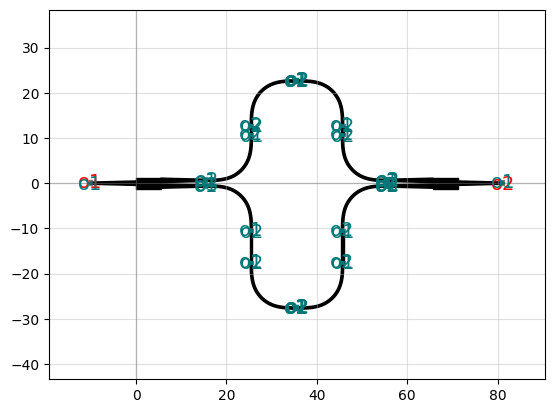

mzi: uid 097b0240, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_7', 'bend_euler_8', 'straight_8', 'straight_9', 'straight_10', 'sytl', 'syl', 'sxt', 'sxb', 'cp1', 'cp2'], 0 polygons

In [3]:
c

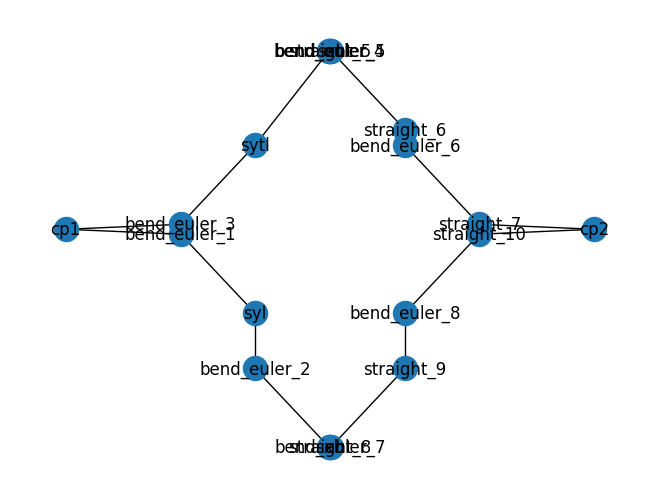

In [4]:
c.plot_netlist()

### Straight

Lets start with the Sparameter model of a straight waveguide.

The models are for lossless elements.

2022-11-27 23:49:13.005 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


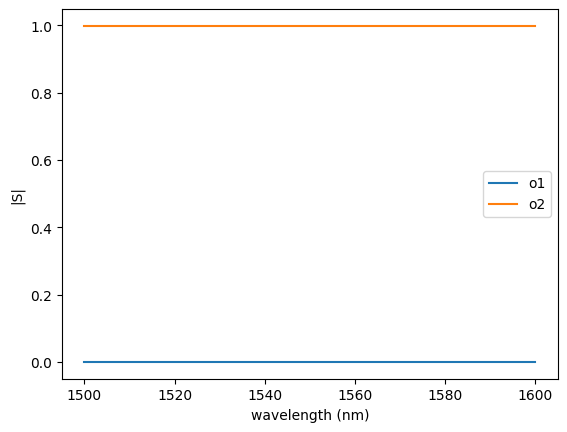

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [5]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-11-27 23:49:13.125 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


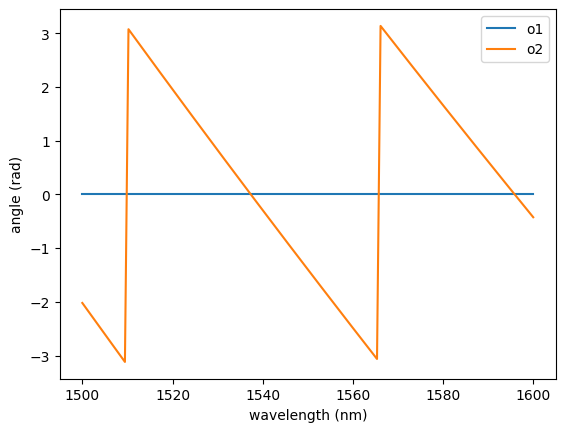

<AxesSubplot: xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [6]:
m = gc.straight()
wavelengths = np.linspace(1500, 1600, 128) * 1e-9
gs.plot_model(m, phase=True, wavelengths=wavelengths)

### Bend

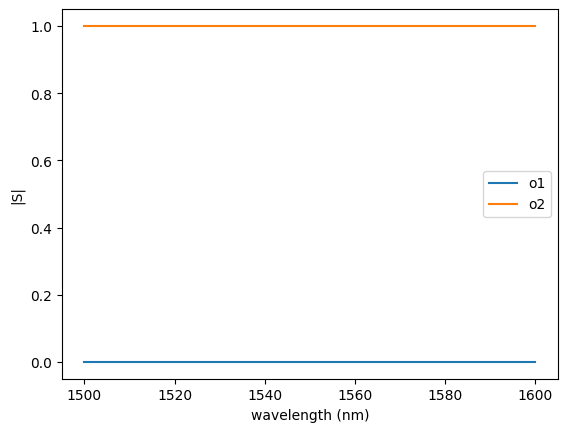

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [7]:
m = gc.bend_circular(radius=2)  # this bend should have some loss
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

2022-11-27 23:49:13.357 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


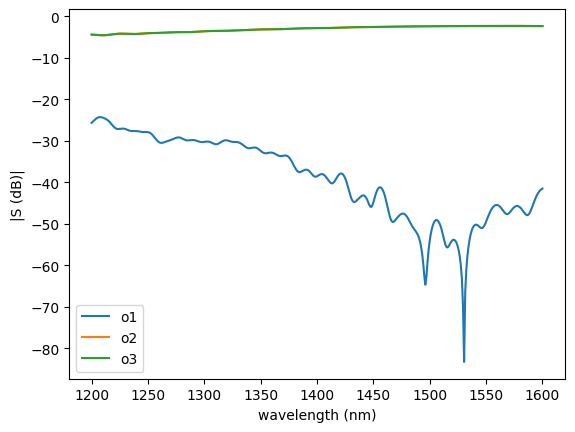

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [8]:
m = gc.mmi1x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in="o1")

2022-11-27 23:49:13.514 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


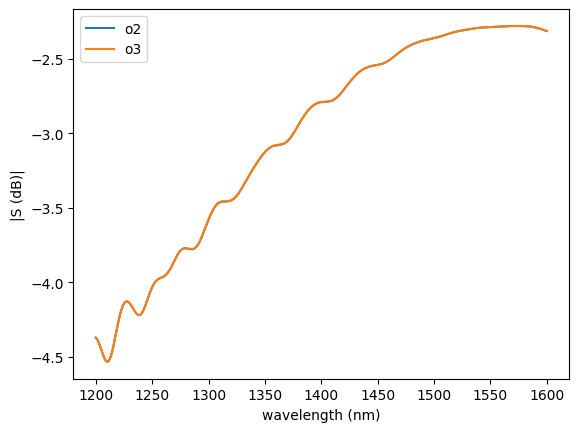

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [9]:
m = gc.mmi1x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m, pin_in="o1", pins=["o2", "o3"])

2022-11-27 23:49:13.652 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


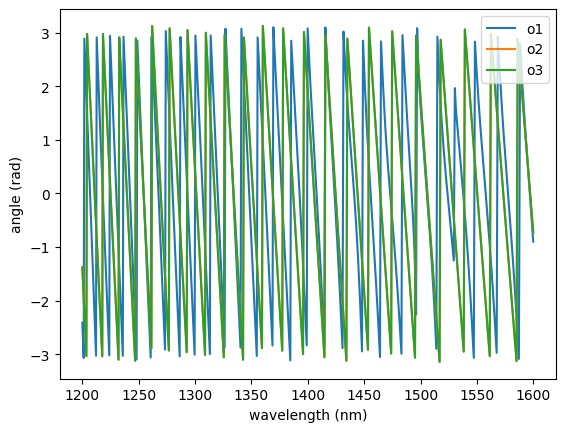

<AxesSubplot: xlabel='wavelength (nm)', ylabel='angle (rad)'>

In [10]:
m = gc.mmi1x2()
gs.plot_model(m, pin_in="o1", phase=True)

In [11]:
m.pins

In [12]:
pin = m.pins[0]

As you can see the MMI has -20dB reflection and -3dB transmission

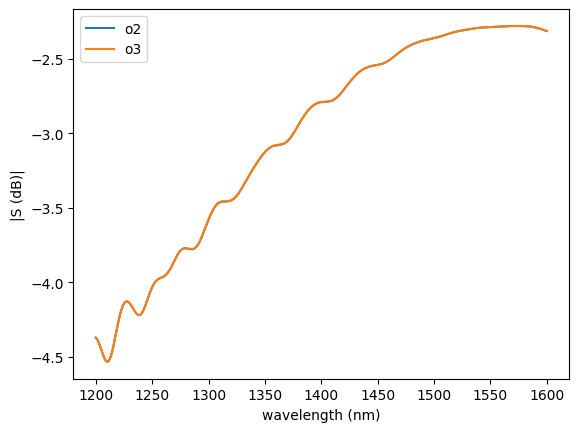

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [13]:
gs.plot_model(m, pins=("o2", "o3"))

2022-11-27 23:49:13.978 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi2x2_a95ae1a0.dat


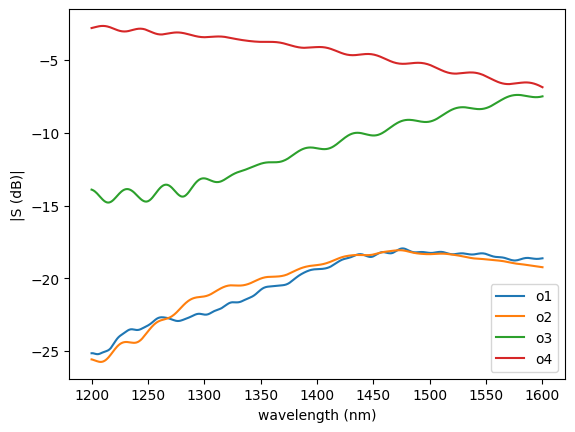

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [14]:
m = gc.mmi2x2()  # this model comes from Lumerical FDTD 3D sims
gs.plot_model(m)

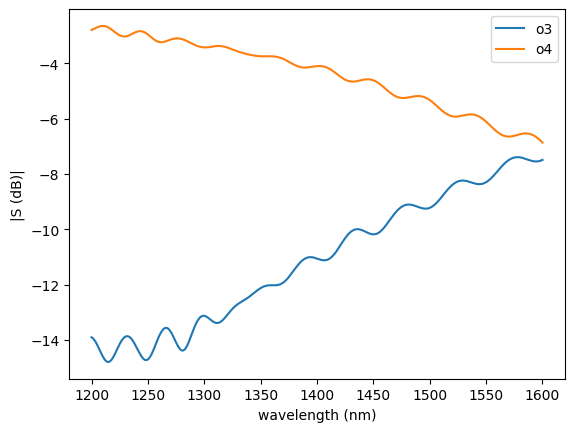

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [15]:
gs.plot_model(m, pins=("o3", "o4"))

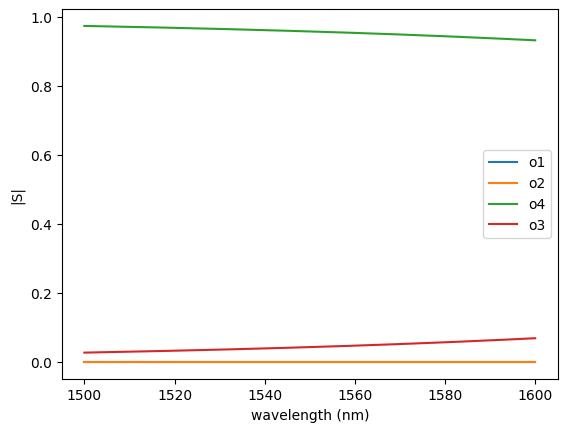

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [16]:
m = gc.coupler_ring()
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

In [17]:
gc.coupler_ring?

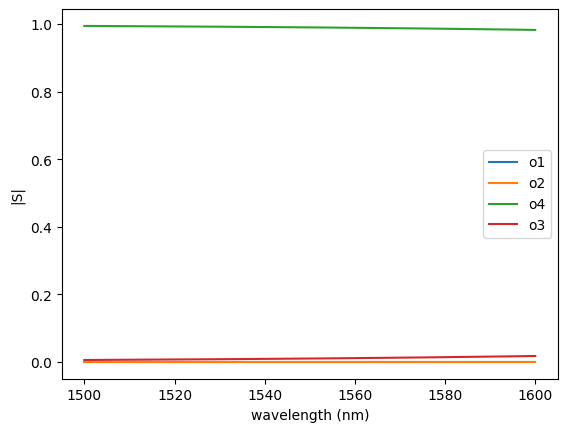

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [18]:
m = gc.coupler_ring(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

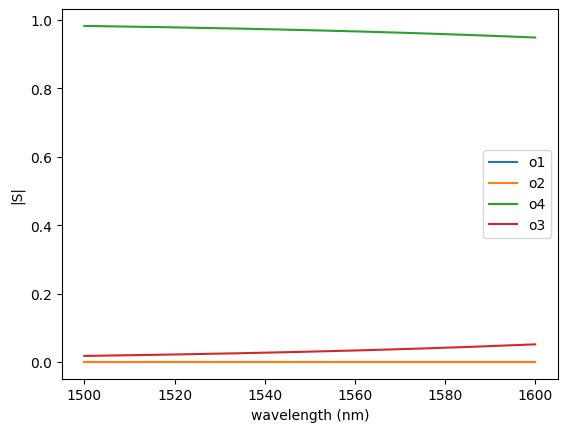

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [19]:
m = gc.coupler(gap=0.3)
gs.plot_model(m, logscale=False, wavelengths=wavelengths)

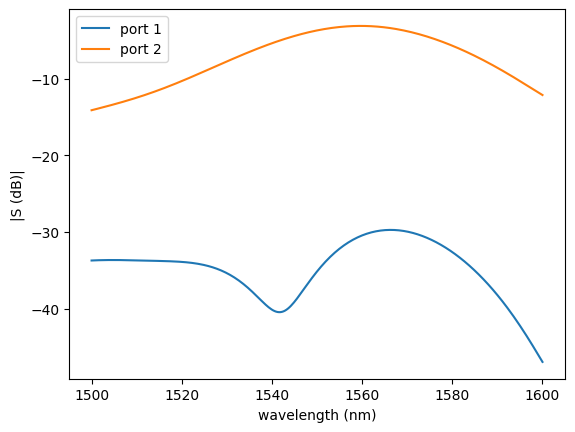

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [20]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")

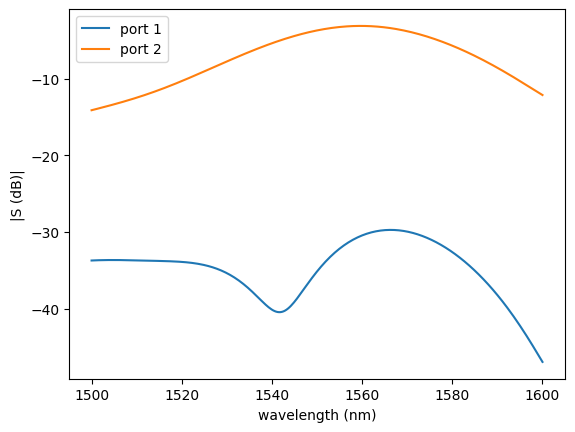

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [21]:
m = gc.gc1550te()
gs.plot_model(m, logscale=True, pin_in="port 1")

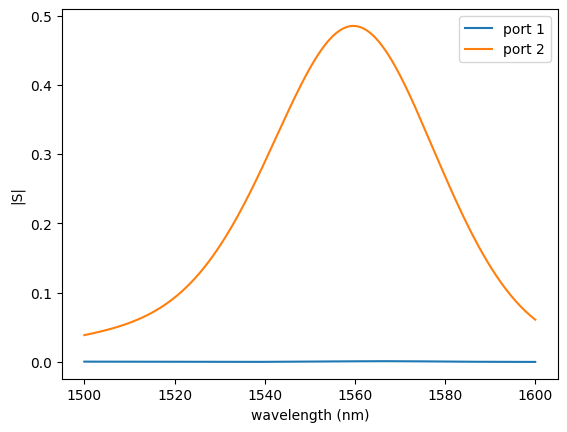

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [22]:
m = gc.gc1550te()
gs.plot_model(m, logscale=False, pin_in="port 1")

## Circuit simulations

With Simphony you can also combine components into circuits

### MZI interferometer

In [23]:
import matplotlib.pyplot as plt
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
import gdsfactory as gf

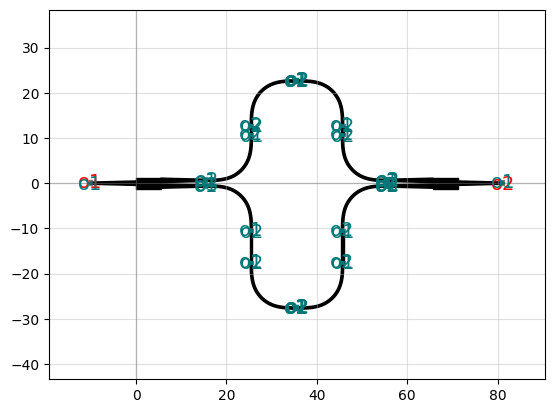

mzi_delta_length10: uid 5f7f1f11, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_7', 'bend_euler_8', 'straight_8', 'straight_9', 'straight_10', 'sytl', 'syl', 'sxt', 'sxb', 'cp1', 'cp2'], 0 polygons

In [24]:
c = gf.components.mzi(delta_length=10)
c

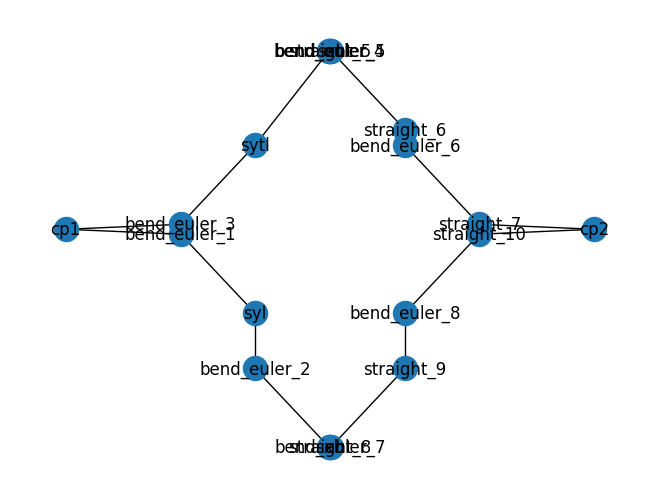

In [25]:
c.plot_netlist()

2022-11-27 23:49:15.602 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:15.620 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:15.638 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:15.640 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


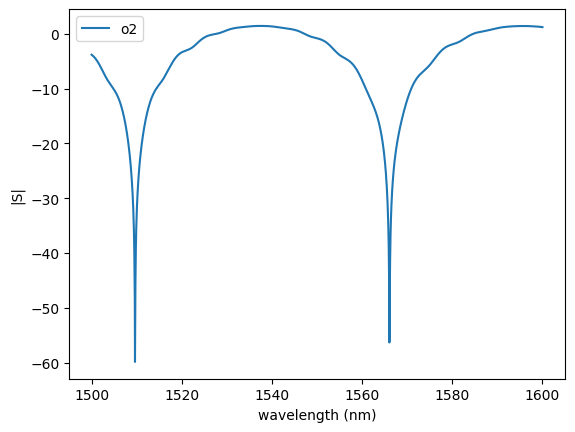

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [26]:
circuit = gs.components.mzi(delta_length=10, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

2022-11-27 23:49:26.402 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:26.420 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:26.436 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:26.438 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


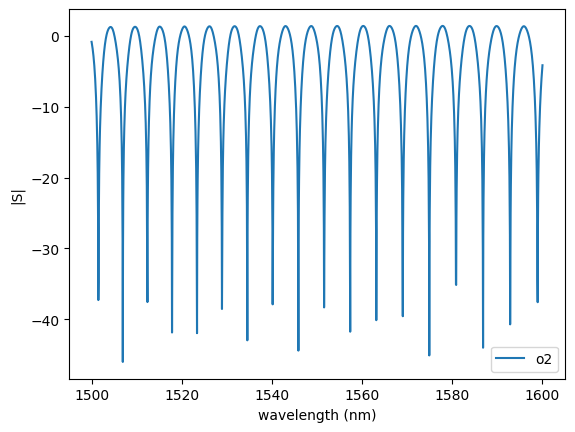

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [27]:
circuit = gs.components.mzi(delta_length=100, splitter=gs.components.mmi1x2)

gs.plot_circuit(
    circuit,
    start=1500e-9,
    stop=1600e-9,
    logscale=True,
)

Lets add grating couplers to the mzi circuit.

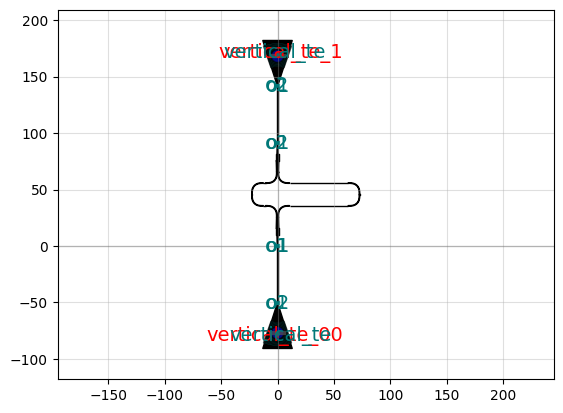

mzi_delta_length100_mov_963dd88c: uid 4701fa51, ports ['vertical_te_00', 'vertical_te_1'], references ['move_1', 'straight_1', 'straight_2', 'grating_coupler_elliptical_trenches_1', 'grating_coupler_elliptical_trenches_2'], 0 polygons

In [28]:
mzi_layout = gf.components.mzi(delta_length=100)
mzi_with_gc_layout = gf.routing.add_fiber_single(
    component=mzi_layout, with_loopback=False
)
mzi_with_gc_layout

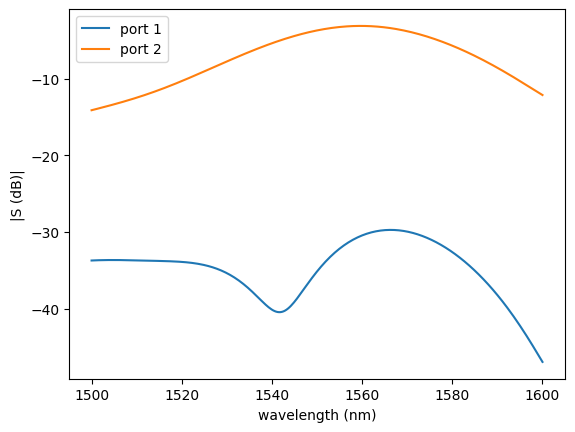

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S (dB)|'>

In [29]:
c = gc.gc1550te()
gs.plot_model(c, pin_in="port 1")

### MZI interferometer from layout

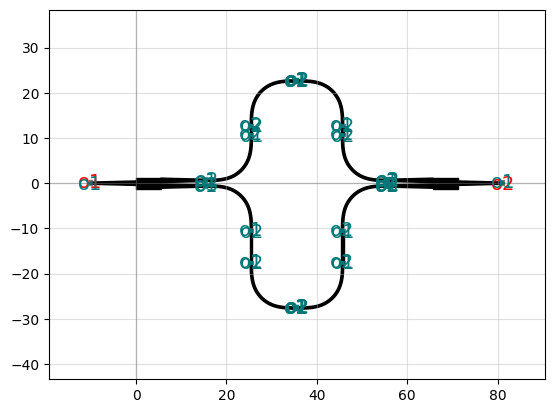

mzi_delta_length10: uid 5f7f1f11, ports ['o1', 'o2'], references ['bend_euler_1', 'bend_euler_2', 'bend_euler_3', 'bend_euler_4', 'bend_euler_5', 'bend_euler_6', 'straight_5', 'straight_6', 'straight_7', 'bend_euler_7', 'bend_euler_8', 'straight_8', 'straight_9', 'straight_10', 'sytl', 'syl', 'sxt', 'sxb', 'cp1', 'cp2'], 0 polygons

In [30]:
import gdsfactory as gf
import gdsfactory.simulation.simphony as gs
import gdsfactory.simulation.simphony.components as gc
from simphony.libraries import siepic

c = gf.components.mzi(delta_length=10)
c

2022-11-27 23:49:37.798 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:37.815 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:37.832 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:37.833 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:37.835 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:37.837 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:37.838 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:37.840 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:37.841 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:37.843 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:37.845 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:37.846 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


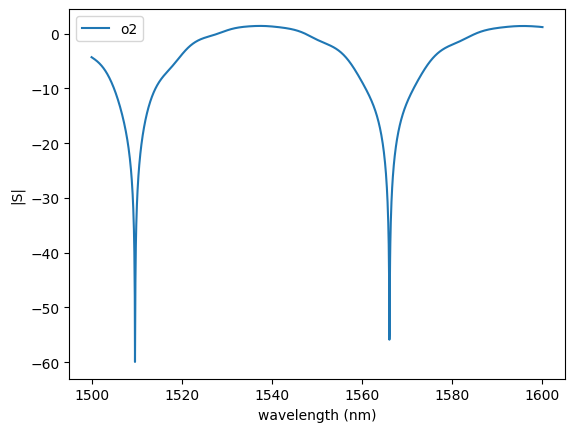

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [31]:
cm = gs.component_to_circuit(c)
gs.plot_circuit(cm)

In [32]:
c = gf.components.mzi(
    delta_length=20
)  # Double the delta length should reduce FSR by half
cm = gs.component_to_circuit(c)

2022-11-27 23:49:49.906 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:49.923 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:49:49.940 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:49.942 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:49.943 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:49.945 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:49.947 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:49.948 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys(['cross_section'])


2022-11-27 23:49:49.950 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:49.951 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:49.953 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:49:49.955 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


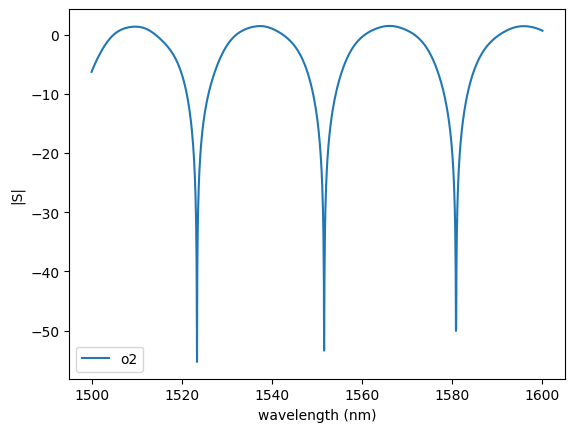

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [33]:
gs.plot_circuit(cm)

### Ring resonator


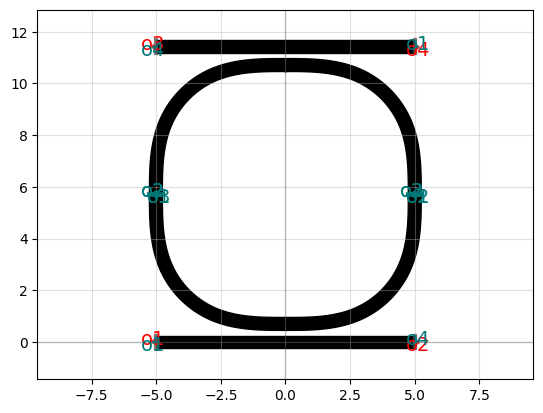

ring_double_radius5: uid c6e1c8c1, ports ['o1', 'o2', 'o3', 'o4'], references ['coupler_ring_1', 'coupler_ring_2', 'straight_1', 'straight_2'], 0 polygons

In [34]:
c = gf.components.ring_double(radius=5)
c

2022-11-27 23:50:02.202 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:50:02.204 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


/home/runner/work/gdsfactory/gdsfactory/gdsfactory/simulation/simphony/plot_circuit.py:64: RuntimeWarning: divide by zero encountered in log10
  y = 10 * np.log10(y) if logscale else y


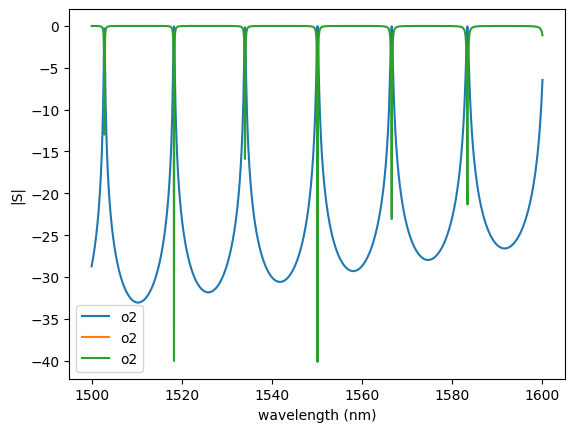

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [35]:
c = gc.ring_double(radius=5)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])

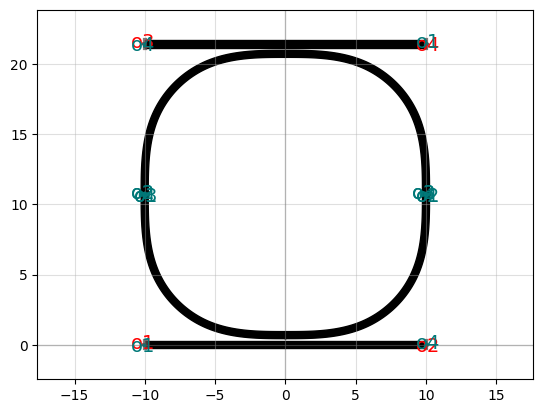

ring_double_radius10: uid d2e9c053, ports ['o1', 'o2', 'o3', 'o4'], references ['coupler_ring_1', 'coupler_ring_2', 'straight_1', 'straight_2'], 0 polygons

In [36]:
c = gf.components.ring_double(radius=10)  # double radius, reduces FSR by half.
c

2022-11-27 23:50:37.437 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:50:37.439 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


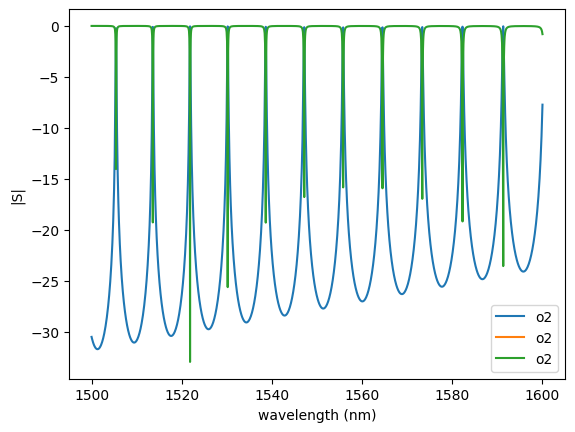

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [37]:
c = gs.components.ring_double(radius=10)
gs.plot_circuit(c, pins_out=["o2", "o3", "o4"])

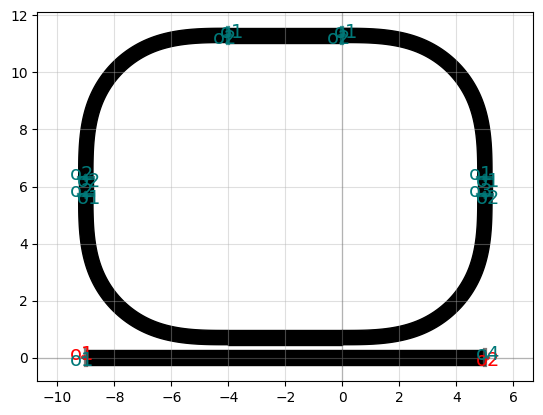

ring_single_radius5: uid 854a2629, ports ['o2', 'o1'], references ['coupler_ring_1', 'straight_1', 'straight_2', 'bend_euler_1', 'bend_euler_2', 'straight_3'], 0 polygons

In [38]:
c = gf.components.ring_single(radius=5)
c

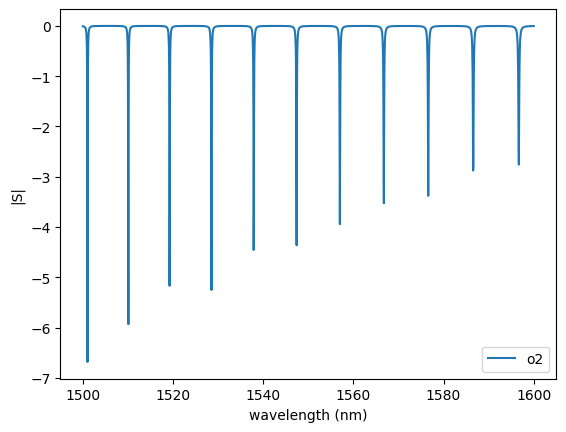

<AxesSubplot: xlabel='wavelength (nm)', ylabel='|S|'>

In [39]:
c = gs.components.ring_single(radius=10)
gs.plot_circuit(c, pins_out=["o2"])

## Montecarlo variability simulation

As you define your circuit models you can also include the standard deviation for each component model.

For example for the waveguide model you can define:

```
sigma_ne: Standard deviation of the effective index for monte carlo simulations (default 0.05).
sigma_ng: Standard deviation of the group velocity for monte carlo simulations
sigma_nd: Standard deviation of the group dispersion for monte carlo simulations
```

And you can pass `runs` to change the number of Monte Carlo iterations to run.

The variability values are foundry specific and they relate to the width and sigma variations from the fabrication process.

2022-11-27 23:51:18.102 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:51:18.119 | INFO     | gdsfactory.simulation.lumerical.read:read_sparameters_lumerical:129 - Sparameters loaded from /home/runner/work/gdsfactory/gdsfactory/gdslib/sp/mmi1x2_a95ae1a0.dat


2022-11-27 23:51:18.136 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


2022-11-27 23:51:18.138 | INFO     | gdsfactory.simulation.simphony.components.straight:straight:23 - ignoring dict_keys([])


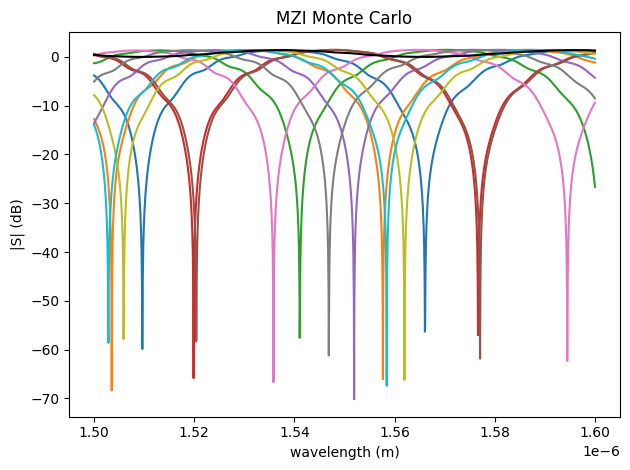

In [40]:
circuit = gs.components.mzi(delta_length=10)

gs.plot_circuit_montecarlo(circuit, runs=10)